In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib.font_manager import FontProperties
# FONT_NAME = r"HelveticaNeue.ttc"
# FONT_PATH = "/System/Library/Fonts"
FONT_PATH = "/Library/Fonts"
FONT_NAME = "Arial Unicode.ttf"
font = FontProperties(fname=os.path.join(FONT_PATH, FONT_NAME))

## 一般的折線圖

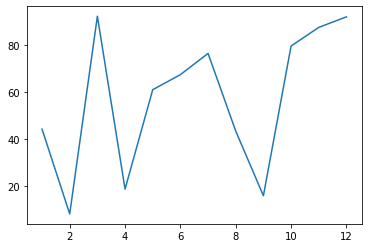

In [4]:
x_list = np.arange(1, 13)
y_list = [44.19426457, 8.1909339, 92.18200309, 18.74227427,
          60.96995208, 67.3567001, 76.39679078, 43.39376997,
          15.91217447, 79.51713484, 87.44432885, 91.9136526]

plt.plot(x_list, y_list)
plt.show()

## 長條圖

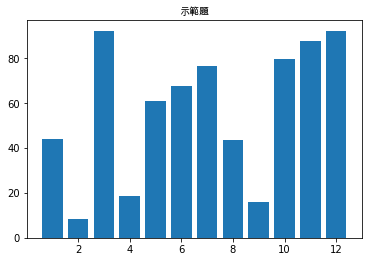

In [43]:
x_list = np.arange(1, 13)
y_list = [44.19426457, 8.1909339, 92.18200309, 18.74227427,
          60.96995208, 67.3567001, 76.39679078, 43.39376997,
          15.91217447, 79.51713484, 87.44432885, 91.9136526]

plt.bar(x_list, y_list)
plt.title('示範題', fontproperties=font)
plt.show()

## 堆疊長條圖

In [45]:
y_list = np.float16(5*np.random.rand(12, ))

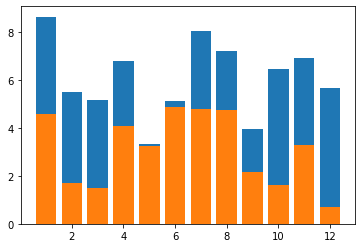

In [48]:
base_list = [4.57, 1.716, 1.492, 4.086, 3.242, 4.88, 4.797,
             4.73, 2.152 , 1.623 , 3.309 , 0.6895]
y_list = [4.074, 3.8, 3.69, 2.709, 0.077, 0.2471, 3.264, 2.5, 1.801, 4.84, 3.594, 4.996]

plt.bar(x_list, base_list, color='tab:orange')
plt.bar(x_list, y_list, bottom=base_list, color='tab:blue')
plt.show()

## 雙軸的圖

In [13]:
np.random.seed(123)
y_list_1 = np.float16(50*np.random.rand(12, ))
y_list_2 = np.float16(4*np.random.rand(12, ))

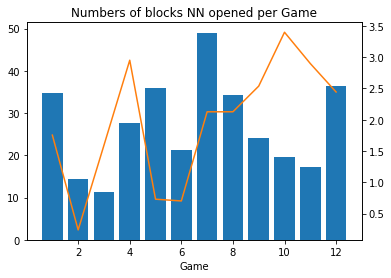

In [16]:
fig, ax1 = plt.subplots()
plt.title('Numbers of blocks NN opened per Game')
ax1.bar(range(1, 13), y_list_1, color='tab:blue')
plt.xlabel('Month')

ax2 = ax1.twinx()
ax2.plot(range(1, 13), y_list_2, color='tab:orange')

plt.show()